# Kickstarter Projects - Data cleaning

In [1]:
# We are gonna install the packages
import pandas as pd
import numpy as np
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV
kickstarters = pd.read_csv("ks-projects-201801.csv")

# Set seed for reproducibility
np.random.seed(0)

C:\Users\usuario\AppData\Local\Temp\ipykernel_18376\3539365075.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Scaling and normalization

##### Scaling

In [5]:
kickstarters

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


Text(0.5, 1.0, 'Scaled data')

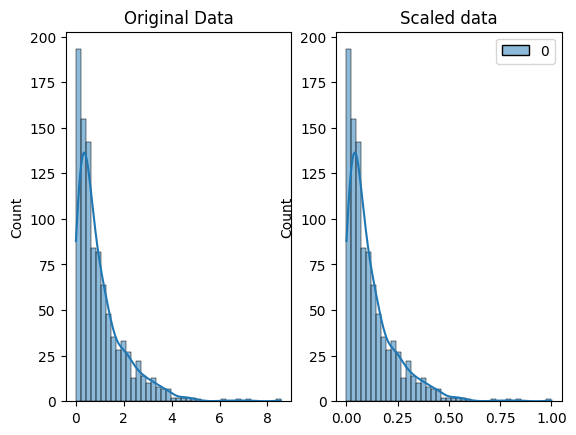

In [2]:
# Generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)

# Scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])

# Plot both together to compare
fig, ax = plt.subplots(1, 2)
sns.histplot(original_data, ax=ax[0], kde=True)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True)
ax[1].set_title("Scaled data")

##### Normalization

Text(0.5, 1.0, 'Normalized Data')

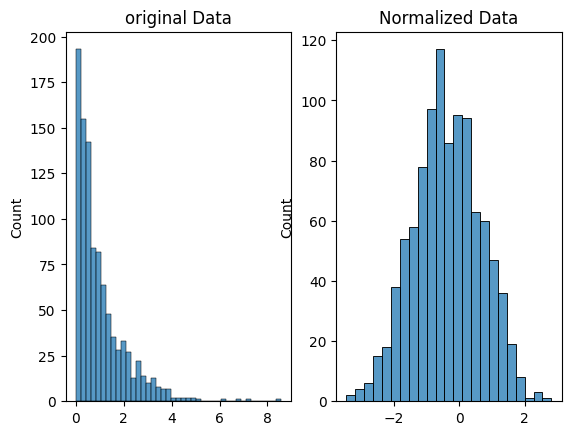

In [3]:
# Normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# Plot both together to compare
fig, ax= plt.subplots(1,2)
sns.histplot(original_data, ax=ax[0])
ax[0].set_title("original Data")
sns.histplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized Data")


#### Now we are going to use our data set to practice

C:\Users\usuario\AppData\Local\Temp\ipykernel_18376\3476786360.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_pledges, ax=ax[0])
C:\Users\usuario\AppData\Local\Temp\ipykernel_18376\3476786360.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalized_pledges, ax=ax[1])


Text(0.5, 1.0, 'Normalized data')

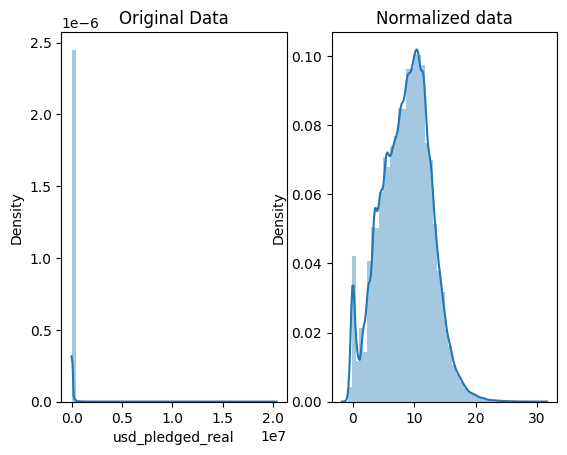

In [6]:
# Get the index of all positive pledges (Box-Cox)
index_of_positive_pledges = kickstarters.usd_pledged_real > 0

# Get only positive pledges
positive_pledges = kickstarters.usd_pledged_real.loc[index_of_positive_pledges]

# Normalized the pledged
normalized_pledges = stats.boxcox(positive_pledges)[0]

# Plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")